# data pre-process

In [89]:
import pandas as pd
import numpy as np

In [90]:
csv_path = './raw_data/voice.csv'
raw_data = pd.read_csv(csv_path)

In [91]:
raw_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [92]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [93]:
from sklearn.preprocessing import LabelEncoder
rdata = raw_data.copy()
encoder = LabelEncoder()
rdata_label = rdata["label"]
rdata_label_encoded = encoder.fit_transform(rdata_label)

rdata.drop(["label"], axis=1, inplace=True)
rdata["label"] = rdata_label_encoded
rdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null int32
dtypes: float64(20), int32(1)
memory usage: 507.5 KB


In [94]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(rdata, test_size=0.2, random_state=42)

train_set = np.array(train_set)
test_set = np.array(test_set)

train_data, train_label = np.split(train_set, indices_or_sections=(20,),axis=1)
test_data, test_label = np.split(test_set, indices_or_sections=(20,),axis=1)
# train_label = np.array(train_set["label"])
# train_data = np.array(train_set.drop(["label"], axis=1, inplace=True))
# test_label = np.array(test_set["label"])
# test_data = np.array(test_set.drop(["label"], axis=1, inplace=True))

In [95]:
from sklearn.ensemble import RandomForestClassifier 
rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=16, n_jobs=-1) 
rnd_clf.fit(train_data, train_label.ravel()) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [153]:
for name, score in zip(raw_data.columns, rnd_clf.feature_importances_):
    print(name, score)

meanfreq 0.01663032889839894
sd 0.08883985411603658
median 0.008713742302683064
Q25 0.14283407713678214
Q75 0.006345268851605645
IQR 0.20882944191288816
skew 0.009027514665140532
kurt 0.005078159985569099
sp.ent 0.04318686486017407
sfm 0.03187305761319526
mode 0.015212802300982922
centroid 0.017368076969929012
meanfun 0.3774749674817237
minfun 0.004496190927680137
maxfun 0.0025060296461817512
meandom 0.004056752376622215
mindom 0.004735150563717299
maxdom 0.004802345373171821
dfrange 0.005144705609226775
modindx 0.002844668408290982


找到
Q25
IQR
作为两个特征

# 抽取 Q25 与 IQR

In [142]:
from sklearn.preprocessing import LabelEncoder
bdata = raw_data.copy()[['Q25', 'IQR', 'label']]
# bdata = raw_data.copy()[['maxfun', 'modindx', 'label']]
encoder = LabelEncoder()
bdata_label = bdata["label"]
bdata_label_encoded = encoder.fit_transform(bdata_label)

bdata.drop(["label"], axis=1, inplace=True)
bdata["label"] = bdata_label_encoded
bdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 3 columns):
Q25      3168 non-null float64
IQR      3168 non-null float64
label    3168 non-null int32
dtypes: float64(2), int32(1)
memory usage: 62.0 KB


In [143]:
bdata.describe()

,Q25,IQR,label
count,3168.000000,3168.000000,3168.000000
mean,0.140456,0.084309,0.500000
std,0.048680,0.042783,0.500079
min,0.000229,0.014558,0.000000
25%,0.111087,0.042560,0.000000
50%,0.140286,0.094280,0.500000
75%,0.175939,0.114175,1.000000
max,0.247347,0.252225,1.000000


In [144]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(bdata, test_size=0.2, random_state=42)

train_set = np.array(train_set)
test_set = np.array(test_set)

train_data, train_label = np.split(train_set, indices_or_sections=(2,),axis=1)
test_data, test_label = np.split(test_set, indices_or_sections=(2,),axis=1)

In [145]:
print(len(train_set))
print(len(test_set))

2534
634


In [146]:
# from sklearn import svm
# classifier = svm.SVC(C=1, kernel='poly', degree=2, gamma='auto', decision_function_shape='ovo') # ovr:一对多策略  尽量使用ovo比较好
# classifier.fit(train_data,train_label.ravel()) # ravel函数在降维时默认是行序优先

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear')
classifier.fit(train_data,train_label.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [147]:
from sklearn.metrics import confusion_matrix
test_data_pred = classifier.predict(test_data)
confusion_matrix(test_label.ravel(), test_data_pred)
# print(test_data_pred)

array([[258,  39],
       [ 27, 310]], dtype=int64)

In [148]:
from sklearn.metrics import classification_report
print(classification_report(test_label.ravel(), test_data_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       297
         1.0       0.89      0.92      0.90       337

   micro avg       0.90      0.90      0.90       634
   macro avg       0.90      0.89      0.90       634
weighted avg       0.90      0.90      0.90       634



In [149]:
from sklearn.metrics import accuracy_score
train_hat = classifier.predict(train_data) # 训练集的预测标签
test_hat = classifier.predict(test_data) # 测试集的预测标签 
print("训练集：",  accuracy_score(train_label,train_hat))
print("测试集：", accuracy_score(test_label,test_hat))

训练集： 0.8796369376479873
测试集： 0.8958990536277602


## 结果可视化

In [105]:
vdata = np.array(bdata)
x1_min, x1_max = test_data[:, 0].min(), test_data[:, 0].max()  # 第0列的范围
x2_min, x2_max = test_data[:, 1].min(), test_data[:, 1].max()  # 第1列的范围
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
print(grid_test)
grid_hat = classifier.predict(grid_test)
grid_hat = grid_hat.reshape(np.shape(x1))
print(grid_hat)

[[0.10309278 0.        ]
 [0.10309278 0.00429498]
 [0.10309278 0.00858996]
 ...
 [0.27911392 0.8461109 ]
 [0.27911392 0.85040588]
 [0.27911392 0.85470085]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


[0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1.

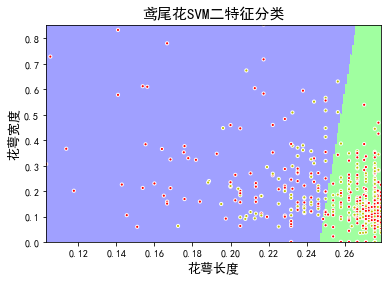

In [108]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# print(test_label.ravel())

# print("++++++++++++++++++++++++++++++++++++++")

# print(test_label.ravel())


mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
 
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['y', 'r'])

alpha = 0.5
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)     # 预测值的显示

plt.scatter(test_data[:, 0], test_data[:, 1], c=test_label.ravel(), edgecolors='w', s=10, cmap=cm_dark)  # 样本

# plt.scatter(train_data[:, 0], train_data[:, 1], c=tra_label, edgecolors='k', s=1, cmap=cm_dark)  # 样本

# plt.scatter(x_test[:, 0], x_test[:, 1], s=120, facecolors='none', zorder=10)  # 圈中测试集样本
plt.xlabel(u'花萼长度', fontsize=13)
plt.ylabel(u'花萼宽度', fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花SVM二特征分类', fontsize=15)
# plt.grid()
plt.show()
plt.close()

# 模型不够复杂 -> 使用 RBF

In [109]:
rb_data =  bdata.copy()
rb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 3 columns):
maxfun     3168 non-null float64
modindx    3168 non-null float64
label      3168 non-null int32
dtypes: float64(2), int32(1)
memory usage: 62.0 KB


## 使用 RBF 额外添加4个属性，去掉原来的两个属性

In [119]:
rb_np = np.array(rb_data)
np.shape(rb_np)

(3168, 3)

In [122]:
gamma = 0.3

In [128]:
ft1 = np.exp(-gamma * (rb_np[:, 0] - np.percentile(rb_np[:, 0], 25)))
ft2 = np.exp(-gamma * (rb_np[:, 0] - np.percentile(rb_np[:, 0], 75)))
ft3 = np.exp(-gamma * (rb_np[:, 1] - np.percentile(rb_np[:, 1], 25)))
ft4 = np.exp(-gamma * (rb_np[:, 1] - np.percentile(rb_np[:, 1], 75)))

In [132]:
rb_data_rbf = np.c_[ft1, ft2, ft3, ft4, rb_np[:, 2]]

In [133]:
np.shape(rb_data_rbf)

(3168, 5)

In [135]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(rb_data_rbf, test_size=0.2, random_state=42)

train_set = np.array(train_set)
test_set = np.array(test_set)

train_data, train_label = np.split(train_set, indices_or_sections=(4,),axis=1)
test_data, test_label = np.split(test_set, indices_or_sections=(4,),axis=1)

In [136]:
# from sklearn import svm
# classifier = svm.SVC(C=1, kernel='poly', degree=2, gamma='auto', decision_function_shape='ovo') # ovr:一对多策略  尽量使用ovo比较好
# classifier.fit(train_data,train_label.ravel()) # ravel函数在降维时默认是行序优先

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear')
classifier.fit(train_data,train_label.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [137]:
from sklearn.metrics import confusion_matrix
test_data_pred = classifier.predict(test_data)
confusion_matrix(test_label.ravel(), test_data_pred)
# print(test_data_pred)

array([[252,  45],
       [257,  80]], dtype=int64)

In [139]:
from sklearn.metrics import classification_report
print(classification_report(test_label.ravel(), test_data_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.85      0.63       297
         1.0       0.64      0.24      0.35       337

   micro avg       0.52      0.52      0.52       634
   macro avg       0.57      0.54      0.49       634
weighted avg       0.57      0.52      0.48       634



In [140]:
from sklearn.metrics import accuracy_score
train_hat = classifier.predict(train_data) # 训练集的预测标签
test_hat = classifier.predict(test_data) # 测试集的预测标签 
print("训练集：",  accuracy_score(train_label,train_hat))
print("测试集：", accuracy_score(test_label,test_hat))

训练集： 0.5240726124704025
测试集： 0.5236593059936908


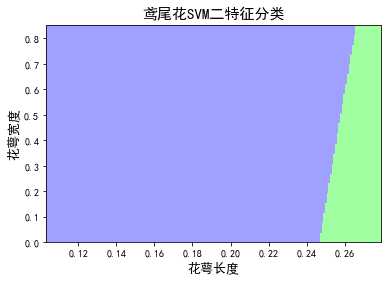

0.253968253968254

NameError: name 'gamma' is not defined

In [118]:
b=np.array([1,2,3])
a = 
a

array([1.34985881, 1.        , 0.74081822])

array([1.16183424, 0.86070798, 0.63762815])

# 模型过拟合 -> 使用 L2范数